# Purpose of recommendation system

## Role of recommendation system in online retail

Online retail is one of the fastest-growing industries, varying in pace globally but firmly integrated into our lives. It will likely maintain this position for the foreseeable future.

Rhodes and Brien (2015) highlighted the growth of online retail in the UK, where sales increased from 2.7% in 2007 to 11.1% in 2013. Similarly, Rao et al. (2021) project a 14% annual growth rate from 2020 to 2027, noting the market size in 2019 was $9 trillion.

Several factors drive this rapid growth, including cost savings, better product selection, and ease of use. However, recommendation systems stand out as a key driver, enabled by advanced technology.

As summarised by Fayyaz et al. (2020), recommendation systems reduce overload and enhance customer experiences by tailoring product suggestions based on user activity, purchase history, and product attributes. This personalisation boosts engagement and loyalty—a win-win strategy where companies gain loyal customers, and consumers receive tailored experiences.

Beyond personalisation, recommendation systems offer additional benefits:

• **Stock Management:** Companies can prioritise selling items tied to customer preferences or those with storage constraints.

• **Upselling:** Businesses can increase sales by suggesting complementary or premium products.

• **Expanding Customer Segments:** Personalised experiences help reach a broader demographic.

Given these advantages, recommendation systems are essential in online retail, influencing purchasing decisions and driving revenue growth.


## Role of macine learning in recommendation systems

Machine learning is vital for modern recommendation systems. It enables analysis of vast data—user activity, purchase history, ratings, and item descriptions—to identify customer patterns and needs individually. This allows companies to reach more customers, offer personalised experiences, and adapt to dynamic, competitive environments.

A major benefit of machine learning is its ability to process both explicit and implicit feedback:

  • **Explicit feedback:** is product rating of review that users leave intentionally.
  
  • **Implicit feedback:** is data that customers leave interacting with a company such as purchasing history, browsing websites, or clicking.


Machine learning models, such as collaborative and content-based filtering, analyse this data to identify similarities between customers or items, generating precise recommendations.

By combining models and adjusting them to business goals, companies can achieve high recommendation accuracy. Liu (2022) highlights that developing effective systems involves evaluating numerous parameters and models to meet customer needs.


## Approaches to build a recommendation system

### Content Based

Content-based recommendation systems predict customer needs by analysing item attributes like keywords, categories, or descriptions to find similarities. For instance, if a customer frequently orders gardening products, the system might recommend other gardening-related items. This approach operates independently of other users' activity data.

Javed et al. (2021) provide an in-depth comparison of content-based models and collaborative filtering, with a focus on NLP techniques.

To build a content-based recommendation system, we use two key techniques:

#### TF-IDF transformation

Term Frequency-Inverse Document Frequency measures the importance of words in a description while downweighting irrelevant terms. This helps compare product descriptions by identifying key commonalities, making it especially effective for items like books or movies with detailed descriptions.

##### Equation for TF-IDF transformation:

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$
</span>
</div>

**Where**

**1. Term Frequency (TF)**

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
   \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
$$
</span>
</div>

2. **Inverse Document Frequency (IDF)**

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
\text{IDF}(t) = \log \left(\frac{N}{1 + \text{DF}(t)}\right)
$$
</span>
</div>

In our assessment we are going to use a **TfidfVectorizer** package provided by **sklearn** library.

#### Cosine Similarity

This technique measures the similarity between two items by calculating the cosine of the angle between their feature vectors, assigning a score between 0 (no similarity) and 1 (perfect similarity). We will utilise cosine_similarity from the sklearn library for these calculations.

##### Equation for Cosine similarity:

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
\text{Cosine Similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
$$
</span>
</div>

**Where**

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
\|\mathbf{A}\| = \sqrt{\sum_{i=1}^n A_i^2} \quad \text{and} \quad \|\mathbf{B}\| = \sqrt{\sum_{i=1}^n B_i^2}
$$
</span>
</div>

### Collabarative Filtering 

Collaborative filtering is a widely used recommendation technique that predicts customer preferences based on the activity of similar users. This approach involves creating a cosine similarity matrix for user similarity and applying the K-Nearest Neighbors (KNN) model, which identifies the closest users in a high-dimensional space.

The same approach was applied by Cui, B.B., (2017) where the author designs and implements a recommendation system based on a movie dataset.

# Implementation

## Libraries

In [1]:
# pip install mlxtend
# pip install jupyter-dash dash pandas plotly
# pip install statsmodels

In [2]:
# general
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import time

# preparation
from sklearn.model_selection import train_test_split

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
# evaluation
from sklearn.metrics import mean_squared_error

# modelling
from sklearn.neighbors import NearestNeighbors

# dashboard
import plotly.express as px  
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

/opt/anaconda3/envs/second/lib/python3.9/site-packages/dash/_jupyter.py:29: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")


## Data overview

##### Table 1 (Dataset head)

In [3]:
df = pd.read_csv("file.csv")
df.sample(5)

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
1939,1939,15525.0,M,New York,48.0,17461.0,2019-01-09,GGOEGGOA017399,Maze Pen,Office,...,0.98,6.5,Not Used,0.10,1/9/2019,5000.0,3287.83,1,OFF10,10.0
24775,24775,18223.0,M,Washington DC,44.0,37783.0,2019-09-09,GGOEGAEJ028014,Google Women's Short Sleeve Hero Tee Grey,Apparel,...,5.10,6.0,Used,0.18,9/9/2019,2500.0,1749.21,9,SALE30,30.0
36124,36124,12748.0,F,Chicago,28.0,26583.0,2019-04-27,GGOEGAAJ032314,Google Men's Short Sleeve Hero Tee Charcoal,Apparel,...,18.99,6.0,Not Used,0.18,4/27/2019,3500.0,2056.17,4,SALE10,10.0
676,676,14395.0,M,New Jersey,4.0,19224.0,2019-01-30,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.10,1/30/2019,700.0,981.86,1,ELEC10,10.0
52138,52138,12782.0,F,Chicago,19.0,31249.0,2019-06-26,GGOEGHPJ080310,Google Blackout Cap,Headgear,...,15.19,6.0,Clicked,0.05,6/26/2019,1500.0,1478.19,6,HGEAR30,30.0


As we can see, the dataset offers multiple interesting features for building a recommendation system. Depending on the chosen approach, we will use specific features. For example, with a content-based approach, we need to consider only data about the item itself, particularly its description. However, for a user-user approach, we primarily need to focus on customers' purchasing patterns.

In [4]:
unique_cust = df['CustomerID'].nunique()
unique_sku = df['Product_SKU'].nunique()
unique_disc = df['Product_Description'].nunique()
unique_loc = df['Location'].nunique()
unique_tr = df['Transaction_ID'].nunique()
print(f"----- Unique values ------")
print(f"Unique customers:", unique_cust)
print(f"Unique products IDs:", unique_sku)
print(f"Unique products descriptions:", unique_disc)
print(f"Unique locations:", unique_loc)
print(f"Unique transactions:", unique_tr)
print(f"DF shape:", df.shape)
print(f"----- Missing values ------")
missing_values = df.isna().sum()
print(missing_values)

----- Unique values ------
Unique customers: 1468
Unique products IDs: 1145
Unique products descriptions: 404
Unique locations: 5
Unique transactions: 25061
DF shape: (52955, 21)
----- Missing values ------
Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64


1. First, we observe that our DataFrame contains nearly 53,000 records, but only about half are unique transactions. This indicates that some purchases involved a single item, while others included multiple items.
2. There is a notable difference between the number of unique Product SKUs (1,145), which serve as unique item IDs, and the number of unique product descriptions (404). Since this gap cannot be attributed to missing values, we can infer that some products are identical or very similar despite having different IDs. This is a common phenomenon in online retail, especially when multiple suppliers sell similar products on platforms like Amazon or Walmart.
3. The dataset includes 1,468 unique customers, suggesting that some customers made multiple transactions or included multiple items in a single transaction.

## Content-Based Recomendation System

#### Based on the product discription

In this stage, we are going to create a recommendation model based on product descriptions, following these steps:
1. Read the file and select only the relevant features. Drop any duplicates and missing values.
2. Apply the TF-IDF Vectorizer to extract unique words from the description feature and transform them into columns representing the word occurrences.
3. Create a cosine similarity matrix where each SKU is compared with every other SKU based on the number of common words in their descriptions. Similarity is represented as a score, where 1 indicates complete similarity and 0 indicates no similarity.
4. Associate each product description with a unique row in the DataFrame.
5. Create a function that takes a product as input and generates recommendations.

In [5]:
# read the file
df = pd.read_csv("file.csv")
df = df[["Product_Description", "Product_SKU"]]
df = df.drop_duplicates()
df = df.dropna()
df.shape

(1145, 2)

In [6]:
# display 5 random records
df.sample(5)

,Product_Description,Product_SKU
7766,Nest Secure Alarm System Starter Pack - USA,GGOENEBQ092299
2201,YouTube Twill Cap,GGOEYHPB072210
2809,YouTube Men's Short Sleeve Hero Tee Charcoal,GGOEYAAJ032514
3307,Google Insulated Stainless Steel Bottle,GGOEGDHB072099
32494,Google Toddler Short Sleeve T-shirt Yellow,GGOEGAXT065430


In [7]:
#Set TF-IDF object and remove all stop words
tfidf = TfidfVectorizer(stop_words='english')

df['Product_Description'] = df['Product_Description'].fillna('')

#create a matrix 
tfidf_matrix = tfidf.fit_transform(df['Product_Description'])

# shape
tfidf_matrix.shape

(1145, 360)

In [8]:
tfidf.get_feature_names_out()[200:360]

array(['neck', 'nest', 'ninja', 'noise', 'notebook', 'ocean', 'olive',
       'onesie', 'opener', 'organizer', 'original', 'outdoor',
       'outerstellar', 'oz', 'pack', 'pages', 'panel', 'pants', 'paper',
       'paradise', 'pc', 'peace', 'pen', 'pencil', 'pep', 'perforated',
       'performance', 'pet', 'pewter', 'phone', 'pink', 'platinum',
       'polo', 'pouch', 'preorder', 'protect', 'protector', 'pullover',
       'purple', 'quilted', 'quot', 'racer', 'raglan', 'rainbow', 'rally',
       'recycled', 'red', 'removable', 'retractable', 'reusable', 'rfid',
       'rise', 'roller', 'rolltop', 'royal', 'rubber', 'rucksack',
       'saddle', 'sage', 'sanitizer', 'satin', 'scoop', 'screen', 'sea',
       'seat', 'secure', 'security', 'selfie', 'sergeant', 'set', 'sheet',
       'shell', 'shine', 'shirt', 'shopping', 'short', 'skater', 'sky',
       'sleeve', 'slender', 'slim', 'small', 'smoke', 'snapback', 'socks',
       'softshell', 'softsided', 'spf', 'spiral', 'sport', 'sports',
 

In [9]:
# cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(1145, 1145)

In [10]:
cosine_sim[1]

array([0.21422596, 1.        , 0.23925464, ..., 0.        , 0.        ,
       0.        ])

In [11]:
indices = pd.Series(df.index, index=df['Product_Description']).drop_duplicates()

In [12]:
indices[:20]

Product_Description
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel       0
Nest Cam Outdoor Security Camera - USA                       2
Nest Protect Smoke + CO White Battery Alarm-USA              3
Nest Cam Indoor Security Camera - USA                       17
Nest Protect Smoke + CO White Wired Alarm-USA               24
Nest Protect Smoke + CO Black Battery Alarm-USA            130
Nest Protect Smoke + CO Black Wired Alarm-USA              391
Google Laptop and Cell Phone Stickers                     1563
Maze Pen                                                  1565
Galaxy Screen Cleaning Cloth                              1566
Badge Holder                                              1567
Ballpoint LED Light Pen                                   1569
Color Changing Grip Pen                                   1570
Colored Pencil Set                                        1571
Spiral Notebook and Pen Set                               1572
Android Sticker Sheet Ultra Removab

In [13]:
def content_based(title, cosine_sim=cosine_sim):
    # Get the index of the product that matches the title
    idx = indices[title]
    
    # pairwise similarity scores 
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort items based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # scores for top 3
    sim_scores = sim_scores[1:4]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Return 3 the most similar by discription items
    return df['Product_Description'].iloc[product_indices]

##### Table 2 (Recommendations by Item-Item approach)

In [14]:
# call the fuction and get recomendation
content_based('Nest Learning Thermostat 3rd Gen-USA - Stainless Steel')

3983    Nest Learning Thermostat 3rd Gen - CA - Stainl...
4077         Nest Learning Thermostat 3rd Gen-USA - White
4064        Nest Learning Thermostat 3rd Gen-USA - Copper
Name: Product_Description, dtype: object

#### Based on the product popularity

Unfortunately, the dataset we selected for this CA does not include ratings information to perform content-based filtering based on ratings. However, we can simulate this data by using the purchase count as a proxy for customer satisfaction. In other words, if a customer has bought an item multiple times, we assume they are satisfied with it. The goal is to create new features that representing customer opinions about products based on their purchase history.

In this stage, we will follow a similar approach to IMDB's rating calculation for movies. However, since our data is different, we will adapt this method to simulate ratings.

As in the previous approach, we will apply a series of data transformations:

1. Read the file and create a new feature, "Rating," based on the quantity of each specific item purchased by a customer.

2. Calculate static properties for the scoring equation.

3. Define a function to apply the equation.

4. Apply the function to the data and store results in a new column, "Score."

The score value reflects product popularity.

In [15]:
df = pd.read_csv("file.csv")
df.head(2)

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


As a rating we will use number of this item was sold. Assuming that 1 purchase equals 1 vote.

In [16]:
df['Rating'] = df.groupby('Product_Description')['Product_Description'].transform('count')
df.sample(3)

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Rating
9682,9682,13767.0,F,Chicago,29.0,35771.0,2019-08-16,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,...,6.0,Clicked,0.10,8/16/2019,3500.0,1692.80,8,OFF20,20.0,806.0
15323,15323,17223.0,F,California,10.0,22917.0,2019-03-15,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,...,6.5,Not Used,0.10,3/15/2019,2000.0,1684.18,3,ELEC30,30.0,3230.0
10682,10682,12652.0,M,New York,21.0,36540.0,2019-08-24,GGOEGAPB057512,Women's Weatherblock Shell Jacket Black,Apparel,...,6.0,Clicked,0.18,8/24/2019,2500.0,2168.34,8,SALE20,20.0,43.0


In [17]:
C = df['Rating'].mean()
print(C)

943.1667296500642


In [18]:
m = df['Avg_Price'].sum()
print(m)

2764625.2


In [19]:
m = df['Avg_Price'].quantile(0.90)
print(m)

149.0


In [20]:
df_score = df.copy().loc[df['Avg_Price'] >= m]
df_score.shape

(6671, 22)

In [21]:
def weighted_rating(x, m = m, C = C):
    v = x['Rating']
    R = x['Avg_Price']
    return (v / (v + m) * R) + (m / (m + v) * C)

In [22]:
df_score['score'] = df_score.apply(weighted_rating, axis = 1)

##### Table 3 (Recommendation by Calculating popularity)

In [23]:
df_score = df_score.sort_values('score', ascending = False)

df2 = df_score[['Product_Description', 'Avg_Price', 'Rating', 'score']]
df2 = df2.drop_duplicates()

df2.head(10)

,Product_Description,Avg_Price,Rating,score
8068,Nest Cam IQ - CA,274.19,4.0,925.677142
51671,Nest Cam IQ - CA,269.00,4.0,925.541456
8277,Nest Thermostat E - CA,151.88,10.0,893.400269
51663,Nest Thermostat E - CA,149.99,10.0,893.281401
30598,Nest Thermostat E - CA,149.00,10.0,893.219137
7394,Google Rolltop Backpack Blue,152.88,27.0,821.929561
29668,Google Rolltop Backpack Blue,149.99,27.0,821.486209
52068,Gift Card - $250.00,254.82,45.0,783.498674
52682,Gift Card - $250.00,250.00,45.0,782.380633
3989,Nest Cam Outdoor Security Camera - CA,153.71,60.0,716.528434


### Collaborative filtering

In [24]:
df = pd.read_csv("file.csv")

In [25]:
df = df[["CustomerID", "Product_Description"]]
df.head(2)

,CustomerID,Product_Description
0,17850.0,Nest Learning Thermostat 3rd Gen-USA - Stainle...
1,17850.0,Nest Learning Thermostat 3rd Gen-USA - Stainle...


In [26]:
df['Rank'] = df.groupby(['CustomerID', 'Product_Description'])['Product_Description'].transform('count')
df.head(2)

,CustomerID,Product_Description,Rank
0,17850.0,Nest Learning Thermostat 3rd Gen-USA - Stainle...,46.0
1,17850.0,Nest Learning Thermostat 3rd Gen-USA - Stainle...,46.0


In [27]:
df = df.drop_duplicates()
df.sample(2)

,CustomerID,Product_Description,Rank
41642,14298.0,Google Toddler Raglan Shirt Blue Heather/Navy,1.0
7873,13819.0,Nest Cam IQ - USA,2.0


In [28]:
missing_values = df.isna().sum()
print(missing_values)

CustomerID             1
Product_Description    1
Rank                   1
dtype: int64


In [29]:
df = df.dropna()

In [30]:
df.shape

(33613, 3)

In [31]:
df = df[df.groupby('CustomerID')['CustomerID'].transform('count') > 1]
df.shape

(33546, 3)

In [32]:
X = df.copy()
y = df['CustomerID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33546, 3), (33546,), (25159, 3), (8387, 3), (25159,), (8387,))

In [33]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def score(cf_model):
    id_pairs = zip(X_test['CustomerID'], X_test['Product_Description'])    
    y_pred = np.array([cf_model(user, movie) for (user, movie) in id_pairs])  
    y_true = np.array(X_test['Rank'])    
    return rmse(y_true, y_pred)

def baseline(user_id, movie_id):
    return 1.0

In [34]:
score(baseline)

1.7618088518417778

In [35]:
r_matrix = X_train.pivot_table(values = 'Rank', index = 'CustomerID', columns = 'Product_Description')

r_matrix.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
def cf_user_mean(CustomerID, Product_Description):
    
    if Product_Description in r_matrix:
        mean_rating = r_matrix[Product_Description].mean()
    
    else:
        mean_rating = 1.0
    
    return mean_rating

In [37]:
score(cf_user_mean)

1.4933123859661472

In [38]:
r_matrix_dummy = r_matrix.copy().fillna(0)

In [39]:
r_matrix_dummy.isnull().sum()

Product_Description
1 oz Hand Sanitizer                                          0
20 oz Stainless Steel Insulated Tumbler                      0
22 oz Android Bottle                                         0
22 oz YouTube Bottle Infuser                                 0
23 oz Wide Mouth Sport Bottle                                0
                                                            ..
YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal    0
YouTube Women's Short Sleeve Tri-blend Badge Tee Grey        0
YouTube Womens 3/4 Sleeve Baseball Raglan White/Black        0
YouTube Wool Heather Cap Heather/Black                       0
YouTube Youth Short Sleeve Tee Red                           0
Length: 402, dtype: int64

In [40]:
cosine_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)

cosine_sim

array([[1.        , 0.        , 0.12700013, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.07370846, ..., 0.12664952, 0.        ,
        0.237559  ],
       [0.12700013, 0.07370846, 1.        , ..., 0.0831411 , 0.        ,
        0.40286929],
       ...,
       [0.        , 0.12664952, 0.0831411 , ..., 1.        , 0.        ,
        0.14514498],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.237559  , 0.40286929, ..., 0.14514498, 0.        ,
        1.        ]])

In [41]:
cosine_sim = pd.DataFrame(cosine_sim, index = r_matrix.index, columns = r_matrix.index)

cosine_sim.head(10)

CustomerID,12346.0,12347.0,12348.0,12350.0,12356.0,12359.0,12370.0,12373.0,12377.0,12383.0,...,18229.0,18230.0,18239.0,18245.0,18250.0,18256.0,18259.0,18260.0,18269.0,18283.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.000000,0.000000,0.127000,0.000000,0.000000,0.000000,0.056433,0.000000,0.000000,0.059976,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.000000,1.000000,0.073708,0.442664,0.249166,0.146599,0.450351,0.105963,0.283687,0.391601,...,0.472275,0.145095,0.564308,0.259554,0.126836,0.000000,0.000000,0.126650,0.000000,0.237559
12348.0,0.127000,0.073708,1.000000,0.000000,0.436184,0.000000,0.086004,0.000000,0.034249,0.030468,...,0.000000,0.000000,0.263430,0.037864,0.000000,0.103695,0.103695,0.083141,0.000000,0.402869
12350.0,0.000000,0.442664,0.000000,1.000000,0.112066,0.080064,0.250428,0.202548,0.130893,0.166344,...,0.193448,0.000000,0.287647,0.062017,0.107754,0.000000,0.000000,0.060523,0.000000,0.113524
12356.0,0.000000,0.249166,0.436184,0.112066,1.000000,0.233285,0.285031,0.000000,0.272418,0.302925,...,0.352284,0.202031,0.563115,0.225877,0.078492,0.000000,0.082479,0.044087,0.000000,0.496165
12359.0,0.000000,0.146599,0.000000,0.080064,0.233285,1.000000,0.081454,0.000000,0.000000,0.242390,...,0.100673,0.000000,0.130984,0.000000,0.000000,0.000000,0.000000,0.125988,0.000000,0.088619
12370.0,0.056433,0.450351,0.086004,0.250428,0.285031,0.081454,1.000000,0.206065,0.517443,0.649851,...,0.708505,0.451466,0.548704,0.496342,0.175401,0.046078,0.000000,0.098518,0.000000,0.415782
12373.0,0.000000,0.105963,0.000000,0.202548,0.000000,0.000000,0.206065,1.000000,0.196946,0.262802,...,0.297133,0.000000,0.071007,0.108866,0.212798,0.000000,0.000000,0.039841,0.105409,0.056048
12377.0,0.000000,0.283687,0.034249,0.130893,0.272418,0.000000,0.517443,0.196946,1.000000,0.485230,...,0.532944,0.404520,0.402057,0.562821,0.196452,0.000000,0.000000,0.132410,0.000000,0.427739


In [42]:
def cf_user_wmean(CustomerID, Product_Description):
    if Product_Description in r_matrix.columns:
        sim_scores = cosine_sim[CustomerID]
        m_ratings = r_matrix[Product_Description]
        idx = m_ratings[m_ratings.isnull()].index
        m_ratings = m_ratings.dropna()
        sim_scores = sim_scores.drop(idx)
        
        m_ratings = m_ratings.fillna(0.0)
        
        wmean_rating = np.dot(sim_scores, m_ratings) / (sim_scores.sum() + 1e-6)  
        
    else:
        wmean_rating = 3.0
    
    return wmean_rating

In [43]:
score(cf_user_wmean)

1.5043625733399506

#### Modelling

In [44]:
# Data Prep.
df = pd.read_csv("file.csv")
df = df[["CustomerID", "Product_Description"]]
df['Rank'] = df.groupby(['CustomerID', 'Product_Description'])['Product_Description'].transform('count')
df = df.drop_duplicates()
df = df.dropna()
df = df[df.groupby('CustomerID')['CustomerID'].transform('count') > 1]

# User-item matrix
user_item_matrix = df.pivot_table(index='CustomerID', columns='Product_Description', values='Rank', fill_value=0)

# Split
X_train, X_test = train_test_split(user_item_matrix, test_size=0.25, random_state=42)

# Train the collaborative filtering model using KNN
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(X_train)

# Function to get recommendations
def user_user(user_id, num_recommendations=1):
    # Get row index for the CustID in the user-item matrix
    if user_id not in user_item_matrix.index:
        print(f"User ID {user_id} not found in the dataset.")
        return []
    
    # Get the user row from in matrix
    user_row = user_item_matrix.loc[user_id].values.reshape(1, -1)
    
    # Find similar users
    distances, indices = model_knn.kneighbors(user_row, n_neighbors=num_recommendations + 1)
    
    # Get the similar users excluding the first entry
    similar_user_indices = indices.flatten()[1:]
    
    # Get the items recommendations from similar users
    similar_users = user_item_matrix.iloc[similar_user_indices]
    
    # Sum the item ranks  across similar users
    recommendations = similar_users.sum(axis=0)
    
    # Exclude products the user already has
    user_products = set(user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index)
    recommendations = recommendations.drop(user_products)
    
    # Get the top recommendations
    recommended_products = recommendations.nlargest(num_recommendations).index.tolist()
    
    return recommended_products

# Test recomndation
user_id = X_test.index[6]
recommendations = user_user(user_id)
print(f"Recommendations for user {user_id}: {recommendations}")

Recommendations for user 15838.0: ['Nest Cam IQ - USA']


### Interpretation

We have tested three approaches for recommendation systems using collaborative filtering:

#### Item-Item Filtering Based on Product Description

Ideal for online retailers offering a wide selection of similar-purpose products, such as a home goods store recommending cushions or blankets to complement a sofa. It can also suggest advanced or higher-priced alternatives.

**Key Consideration:** Product descriptions must be concise and well-written, covering essential attributes

**Benefits:** No need for prior customer activity, making it a great option for new businesses.

#### Recommendations Based on Product Popularity or Ratings

This method ranks items using customer ratings or satisfaction metrics, factoring in both average ratings and the volume of reviews. Companies can further personalise recommendations using demographic data.

**Benefits:** Provides instant recommendations without requiring user activity.

**Drawbacks:** Relies on other users' opinions and requires a large dataset to ensure accuracy.

#### User-User Collaborative Filtering

Focuses on customer activity or purchase history, making it effective for companies with diverse products and extensive customer data. It matches users based on similar behavior instead of product descriptions.

**Advantages:** Highly accurate and independent of product descriptions.

**Disadvantages:** Requires significant data and may struggle with new or inactive users.

### Justification

The most suitable method for our dataset is User-User Collaborative Filtering, for the following reasons:

  • **Sufficient Customer Activity Patterns:** The dataset contains enough purchase patterns to link customers with similar preferences, enabling accurate recommendations. More patterns enhance the reliability of these connections.

  • **Limited Product Descriptions:** While product descriptions are included, they lack the detail required for effective Item-Item filtering or content-based approaches, making User-User filtering a better fit as it doesn’t depend on metadata.

  • **Ability to Recommend wide range of products:** User-User filtering can recommend items across categories by leveraging user similarities, increasing engagement with diverse suggestions beyond what customers might consider.

  • **Introducing new products:** Recommendations rely on customer activity, not product descriptions, allowing new items to be recommended without extensive metadata or purchase history, unlike Item-Item filtering.

  

# Market Basket Analysis (MBA)

## Role of MBA in online retail

Market Basket Analysis (MBA) is a powerful method for identifying purchasing patterns and generating recommendations. Unlike Collaborative Filtering or Content-Based approaches, MBA analyses frequency patterns between purchased items without focusing on specific customers or products.

As highlighted in a study by Zamil, A. (2020), the vast selection in online retail often overwhelms customers. MBA helps online retailers provide clear and accurate recommendations, enhancing customer experience and loyalty.

MBA assumes certain items are linked to common customer needs. For instance, if many customers purchase a drill and safety glasses together, the algorithm infers a connection and recommends safety glasses to customers buying a drill.

The MBA approach relies on several key metrics worth noting.

### Support

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
\text{Support}(X) = \frac{\text{Number of transactions containing } X}{\text{Total number of transactions}}
$$
</span>
</div>

Support describes probability of each item or combination of item appears in the data set.

### Confidence

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
\text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)}
$$
</span>
</div>

Confidence is another probability metric which discribes the likelihood of item X appears within set Y.

### Lift

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
\text{Lift}(X \rightarrow Y) = \frac{\text{Confidence}(X \rightarrow Y)}{\text{Support}(Y)}
$$
</span>
</div>

Lift measures the association of two items or sets of items and how likely they can be purchased together.

### Leverage

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
\text{Leverage}(X \rightarrow Y) = \text{Support}(X \cup Y) - (\text{Support}(X) \times \text{Support}(Y))
$$
</span>
</div>

Leverage is another mertic for measuring association of two items or sets. But in this case they are considered as independent items which do not belong to the same set.

### Conviction

<div style="text-align: center;">
<span style="font-size: 200%;">
$$
\text{Conviction}(X \rightarrow Y) = \frac{1 - \text{Support}(Y)}{1 - \text{Confidence}(X \rightarrow Y)}
$$
</span>
</div>

Conviction measures the degree of implication or dependence between items in an association rule. It reflects the strength of the rule.

## Apriori Principle

In [45]:
df = pd.read_csv("file.csv")
df = df[["CustomerID", "Product_Description"]]
df.head(2)

,CustomerID,Product_Description
0,17850.0,Nest Learning Thermostat 3rd Gen-USA - Stainle...
1,17850.0,Nest Learning Thermostat 3rd Gen-USA - Stainle...


In [46]:
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Product_Description',
    aggfunc=lambda x: True,  
    fill_value=False        
)

customer_product_matrix = customer_product_matrix.reset_index()

customer_product_matrix.head()


Product_Description,CustomerID,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
0,12346.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12347.0,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,12348.0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,12350.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12356.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### Table 4 (MBA Apriory - Frequent Items)

In [47]:
customer_product_matrix = customer_product_matrix.drop('CustomerID', axis=1)

# Calculate the sfrequenct itemsets by calling a method apriori
frequent_itemsets_ap = apriori(customer_product_matrix, min_support = 0.3, use_colnames = True)

In [48]:
print(frequent_itemsets_ap)

     support                                           itemsets
0   0.306540                        (Google 22 oz Water Bottle)
1   0.346730            (Google Laptop and Cell Phone Stickers)
2   0.336512                                (Google Sunglasses)
3   0.649183            (Nest Cam Indoor Security Camera - USA)
4   0.647139           (Nest Cam Outdoor Security Camera - USA)
5   0.648501  (Nest Learning Thermostat 3rd Gen-USA - Stainl...
6   0.369210     (Nest Learning Thermostat 3rd Gen-USA - White)
7   0.437330  (Nest Protect Smoke + CO White Battery Alarm-USA)
8   0.386240    (Nest Protect Smoke + CO White Wired Alarm-USA)
9   0.539510  (Nest Cam Indoor Security Camera - USA, Nest C...
10  0.525204  (Nest Cam Indoor Security Camera - USA, Nest L...
11  0.313351  (Nest Cam Indoor Security Camera - USA, Nest L...
12  0.361035  (Nest Cam Indoor Security Camera - USA, Nest P...
13  0.339918  (Nest Protect Smoke + CO White Wired Alarm-USA...
14  0.523161  (Nest Learning Thermostat 

##### Table 4 (MBA Apriory - Association Rules)

In [49]:

rules_ap = association_rules(frequent_itemsets_ap, metric = "confidence", min_threshold = 0.8)

print(rules_ap.head())

                                         antecedents  \
0            (Nest Cam Indoor Security Camera - USA)   
1           (Nest Cam Outdoor Security Camera - USA)   
2            (Nest Cam Indoor Security Camera - USA)   
3  (Nest Learning Thermostat 3rd Gen-USA - Stainl...   
4     (Nest Learning Thermostat 3rd Gen-USA - White)   

                                         consequents  antecedent support  \
0           (Nest Cam Outdoor Security Camera - USA)            0.649183   
1            (Nest Cam Indoor Security Camera - USA)            0.647139   
2  (Nest Learning Thermostat 3rd Gen-USA - Stainl...            0.649183   
3            (Nest Cam Indoor Security Camera - USA)            0.648501   
4            (Nest Cam Indoor Security Camera - USA)            0.369210   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.647139  0.539510    0.831060  1.284206  0.119398    2.088674   
1            0.649183  0.539510    0.833684  1.2

### Time testing

In [50]:
start_time = time.time()

# Calculate the frequent itemsets by calling the apriori method
frequent_itemsets_ap = apriori(customer_product_matrix, min_support = 0.3, use_colnames = True)

# Calculate association rules
rules_ap = association_rules(frequent_itemsets_ap, metric = "confidence", min_threshold = 0.8)

# End timing
end_time = time.time()

# Calculate the time taken
calculation_time = end_time - start_time

print("Association rules calculated in {:.2f} seconds.".format(calculation_time))

Association rules calculated in 0.00 seconds.


### Function for recommendation 

In [51]:
def recommend_products(rules, product_basket):
    recommendations = set()
    for _, rule in rules.iterrows():
        antecedents = set(rule['antecedents'])
        consequents = set(rule['consequents'])
        
        if antecedents.issubset(product_basket):
            recommendations.update(consequents - set(product_basket))
    
    return list(recommendations)

In [52]:
customer_basket = ['Nest Cam Outdoor Security Camera - USA']
recommendations = recommend_products(rules_ap, customer_basket)
print("Frequent Itemsets:")
print(frequent_itemsets_ap)
print("\nAssociation Rules:")
print(rules_ap)
print(f"\nRecommendations for customer with basket {customer_basket}: {recommendations}")

Frequent Itemsets:
     support                                           itemsets
0   0.306540                        (Google 22 oz Water Bottle)
1   0.346730            (Google Laptop and Cell Phone Stickers)
2   0.336512                                (Google Sunglasses)
3   0.649183            (Nest Cam Indoor Security Camera - USA)
4   0.647139           (Nest Cam Outdoor Security Camera - USA)
5   0.648501  (Nest Learning Thermostat 3rd Gen-USA - Stainl...
6   0.369210     (Nest Learning Thermostat 3rd Gen-USA - White)
7   0.437330  (Nest Protect Smoke + CO White Battery Alarm-USA)
8   0.386240    (Nest Protect Smoke + CO White Wired Alarm-USA)
9   0.539510  (Nest Cam Indoor Security Camera - USA, Nest C...
10  0.525204  (Nest Cam Indoor Security Camera - USA, Nest L...
11  0.313351  (Nest Cam Indoor Security Camera - USA, Nest L...
12  0.361035  (Nest Cam Indoor Security Camera - USA, Nest P...
13  0.339918  (Nest Protect Smoke + CO White Wired Alarm-USA...
14  0.523161  (Nest L

### Explanation of recommendation 

In [53]:
def recommend_products_with_explanations(rules, product_basket):

    recommendations = []
    for _, rule in rules.iterrows():
        antecedents = set(rule['antecedents'])
        consequents = set(rule['consequents'])
        
        if antecedents.issubset(product_basket):
            for consequent in consequents:
                if consequent not in product_basket:
                    recommendations.append((
                        consequent,
                        f"Because you bought {', '.join(antecedents)}, we recommend {consequent}. "
                        f"(Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}, Lift: {rule['lift']:.2f})"
                    ))
    
    return recommendations

In [54]:
recommendations = recommend_products_with_explanations(rules_ap, customer_basket)
for product, explanation in recommendations:
    print(f"Recommended: {product}")
    print(f"Explanation: {explanation}")

Recommended: Nest Cam Indoor Security Camera - USA
Explanation: Because you bought Nest Cam Outdoor Security Camera - USA, we recommend Nest Cam Indoor Security Camera - USA. (Support: 0.54, Confidence: 0.83, Lift: 1.28)
Recommended: Nest Learning Thermostat 3rd Gen-USA - Stainless Steel
Explanation: Because you bought Nest Cam Outdoor Security Camera - USA, we recommend Nest Learning Thermostat 3rd Gen-USA - Stainless Steel. (Support: 0.52, Confidence: 0.81, Lift: 1.25)


##### Figure 1 (Recommendation justification by displaying network plot)

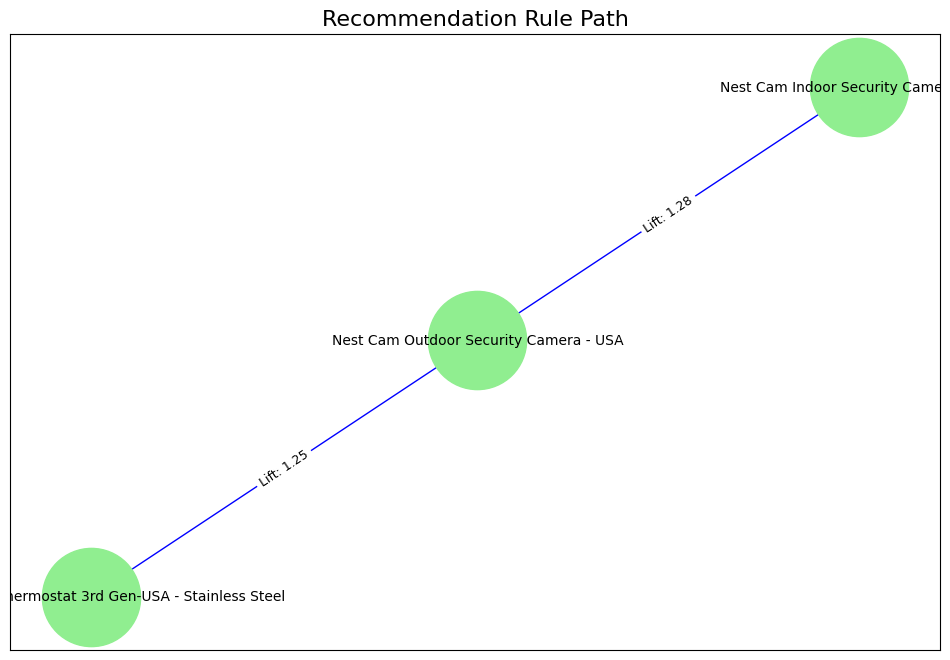

In [55]:
def plot_rule_graph(rules, product_basket):

    G = nx.DiGraph()

    # Add nodes and edges based on rules
    for _, rule in rules.iterrows():
        antecedents = ', '.join(list(rule['antecedents']))
        consequents = ', '.join(list(rule['consequents']))
        
        # include rules where antecedents match the basket
        if set(rule['antecedents']).issubset(product_basket):
            G.add_edge(antecedents, consequents, weight=rule['lift'])
    
    #  graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_size=5000, node_color="lightgreen")
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color="blue")
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: f"Lift: {v:.2f}" for k, v in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title("Recommendation Rule Path", fontsize=16)
    plt.show()

plot_rule_graph(rules_ap, customer_basket)

### Visualisation

##### Figure 2 (Top 10 Rules based on Lift mertic)

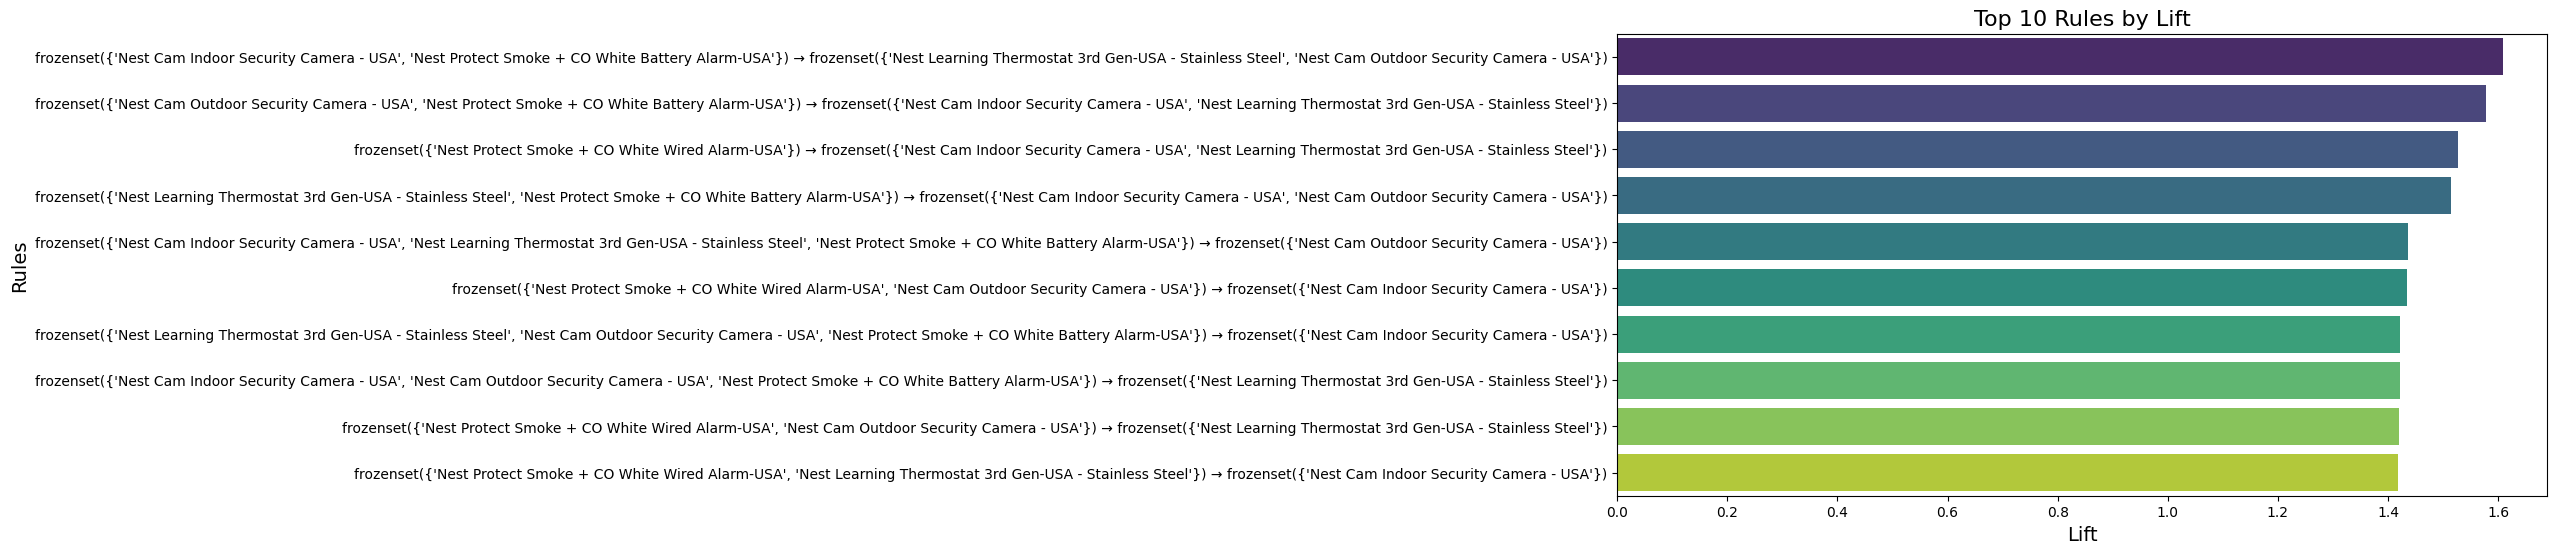

In [56]:
# Plot the top 10 rules based on Lift
top_rules = rules_ap.sort_values('lift', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].astype(str) + ' → ' + top_rules['consequents'].astype(str), palette="viridis")
plt.title("Top 10 Rules by Lift", fontsize=16)
plt.xlabel("Lift", fontsize=14)
plt.ylabel("Rules", fontsize=14)
plt.show()

##### Figure 3 (Co-Occurrence Heatmap)

In [ ]:
co_occurrence = customer_product_matrix.T.dot(customer_product_matrix)

mask = np.triu(np.ones_like(co_occurrence, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence, annot=True, fmt='d', mask=mask, cmap='Blues', cbar=True)
plt.title("Product Co-Occurrence Heatmap", fontsize=16)
plt.xlabel("Products", fontsize=12)
plt.ylabel("Products", fontsize=12)
plt.show()

##### Figure 4 (Network Graph of Association Rules)

In [ ]:

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on rules
for _, rule in rules_ap.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    G.add_edge(antecedents, consequents, weight=rule['lift'])

plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, seed=42) 

# nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightblue")
edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=5, font_color="black", font_weight="bold")

# edge labels for lift
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Network Graph of Association Rules", fontsize=16)
plt.show()


##### Figure 5 (Correlation between metrics)

In [ ]:
sns.pairplot(rules_ap[['support', 'confidence', 'lift']], diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Relationships Between Metrics", y=1.02, fontsize=16)
plt.show()


## FP-Growth

In [ ]:
df = pd.read_csv("file.csv")
df = df[["CustomerID", "Product_Description"]]

In [ ]:
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Product_Description',
    aggfunc=lambda x: True,
    fill_value=False  
)

In [ ]:
customer_product_matrix = customer_product_matrix.reset_index()
customer_product_matrix = customer_product_matrix.drop('CustomerID', axis=1)

In [ ]:
frequent_itemsets_fp = fpgrowth(customer_product_matrix, min_support=0.3, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

In [ ]:
def recommend_products(rules, product_basket):
    recommendations = set()
    for _, rule in rules.iterrows():
        antecedents = set(rule['antecedents'])
        consequents = set(rule['consequents'])
        
        if antecedents.issubset(product_basket):
            recommendations.update(consequents - set(product_basket))
    
    return list(recommendations)


In [ ]:
customer_basket = ['Nest Cam Indoor Security Camera - USA']

recommendations = recommend_products(rules_fp, customer_basket)

print("Frequent Itemsets (FP-Growth):")
print(frequent_itemsets_fp)

print("\nAssociation Rules (FP-Growth):")
print(rules_fp)

print(f"\nRecommendations for customer with basket {customer_basket}: {recommendations}")

In [ ]:
# Find frequent itemsets
frequent_itemsets_fp = fpgrowth(customer_product_matrix, min_support=0.3, use_colnames=True)

#  Association Rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

# Recommendation Function
def recommend_products(rules, product_basket):
    recommendations = set()
    for _, rule in rules.iterrows():
        antecedents = set(rule['antecedents'])
        consequents = set(rule['consequents'])
        
        if antecedents.issubset(product_basket):
            recommendations.update(consequents - set(product_basket))
    
    return list(recommendations)

# Customer Current Basket
customer_basket = ['Nest Cam Indoor Security Camera - USA']

# recomendations for the customer
recommendations = recommend_products(rules_fp, customer_basket)

print("-" * 20)
print("Input")
print(customer_basket)
print("-" * 20)
print(f"\nRecommendations for customer with basket {customer_basket}: {recommendations}")


# Data Visualisation 

## Data overview

In [ ]:
df = pd.read_csv("file.csv")
df.head()

In [ ]:
df = df[['CustomerID',
         'Gender',
         'Location',
         'Transaction_ID',
         'Transaction_Date',
         'Product_Description',
         'Product_Category',
         'Quantity',
         'Avg_Price']]
df.sample(5)

In [ ]:
df.dtypes

In [ ]:
print(df.isnull().sum())

In [ ]:
print(df['Location'].unique())

In [ ]:
print(df.isnull().sum())

In [ ]:
df = df.dropna()

In [ ]:
location_mapping = {
    'Chicago': 'IL', 
    'California': 'CA',  
    'New York': 'NY',   
    'New Jersey': 'NJ',   
    'Washington DC': 'DC',   
}

# Create a new column with maped codes
df['Location_Code'] = df['Location'].map(location_mapping)

df.head()

## Create a Dashboard

## Data Preparation Explanation

We decided to implement 2 recommendation models:

• MBA to provide a recommendation based on selected products.

• Collaborative User-User approach to provide a recommendation based on the activity of other customers.

Additionally, we implemented the SARIMA model to provide users with a time series prediction of sales for the selected time period.

### Key preparation stages:

**Dataset for general**

1. Feature selection - keep only relevant for dashboard features.
2. Create a new feature with state codes for displaying a map.
3. Time formatting.

**Dataset for User-User Recommendation**

For this dashboard feature, we used models which we developed earlier with slight modifications to meet the format.

1. General preparation included (grouping, dropping duplicates and missing values)
2. Creating a User-Item matrix.
3. Splitting the data on train and test.
4. Defining the KNN model and parameters for searching for the closest customers.
5. Function user_user:
   
    • applies trained KNN model to find the most similar customers by purchasing history
   
    • gets items related to the user
   
    • excludes items the user has already purchased
   
    • Return the most relevant items for selected customers.
   
7. Function plot_customer_recommendation_graph explains why recommended features were selected for certain customers by displaying a network plot.

**Dataset for MBA**

1. After all missing values were dropped, we created a User-Item Matrix.
2. Creating an item set with minimum support of 0.3, using apriory approach.
3. Creating rules based on confidence with a threshold of 0.8.

**Forecast**

To make the dashboard more insightful for the user, we added a forecasting model (SARIMA) for daily sales according to specific filtering.
Mostly for this feature, we made a preparation directly in the callback:

1. Using IF statements filter df according to user's requirements.
2. Transform filtered df by the sum of each transaction day.
3. Set Transaction Day as an index.
4. Define the parameters of the SARIMA Model and fit the model.
   Note: Initially we added AutoARIMA to define optimal parameters we each filtered time series. This solution significantly increased the time of response, due to the amount of calculations needed to be done. For those reasons, we excluded that step. However, there are a number of possible solutions how to combine rapid response and accurate forecast. We simply can use a more powerful server on the cloud with more CPU if we deploy this dashboard as an app, or we can train the model separately and create a dictionary with optimal parameters which will used depending on user requests.
5. Get the prediction based on the user's request and display on the plot actual data and a forecast.

## Displayed Data Explanation

Based on requirements to create a dashboard for young adults (18-35 y.o.) we decided to display several charts and tables aligned with certain data visualisation techniques:

### Tab 1: Customer information

Aims to give details about certain customers or demographic groups.
   
#### Sub Tab 1: Specific Customer*
   
Using the Drop-down element or Input Window user can filter df and get all transaction info related to the selected customer displayed as a table. Additionally, there is displayed a bar plot to show customer's purchase distribution grouped by product categories.

    
#### Sub Tab 2: Demographic

In this subtab, users can explore sales data for certain genders and locations.

As an output user can see raw filtered data with all product categories for selected genders and locations, supported by the bar chart.

### Tab 2: Recommendations

#### Sub Tab 1: By Customer

In this sub-tab, we applied Collaborative User-User Filtering. Users can apply the Drop-down element or Input Window to select a customer and the function will provide the top 3 items the most relevant for this customer based on their purchase history. Additionally, we implemented a network plot to explain why the model made that decision.

#### Sub Tab 2: By Product

Similarly, we implemented a recommendation system based on product purchasing frequency using Market Basket Analysis. Users can select a specific product and get a recommended item which has the highest probability of appearing tougher in the dataset.

### Tab 3: Sales

This Tab is dedicated to sales analysis and forecasting.

On the left side, we placed several elements to filter data.

• Time period selector: The user can choose the specific time period to output the data.
• Location Drop-down: Users can choose only those states which are relevant to them.
• Specific product category.
• Bar time period selector, if a user wants to get a daily sales forecast for a specific time.

Output includes 3 elements:

1. Geographic sales distribution: The map displays selected states and their total sales based on selected time and product categories.
2. Daily sales: The line chart illustrates daily total sales made and forecast based on selected parameters.
3. Detailed table: If the user wants to dive into raw data they can find a table with all filtered transactions.

### Dark mode bottom

As a response to the requirement to create a dashboard for the target audience of young adults, we implemented the dark mode feature which aims to reduce visual load. This function may be appropriated by users who spend a significant amount of time in front screens and could be overwhelmed with bright themes.

Note: Added only basic colour switching. For extending Dark mode on the plots and tables, we need to adjust this callback.

### General Dashboard composition

Overall, we tried to follow a familiar target audience structure, which is commonly used nowadays in many apps. The left sidebar is dedicated to managing outputs on the right side.

In [ ]:
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Libraries
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

from jupyter_dash import JupyterDash
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output, dash_table
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import networkx as nx
from dash.dependencies import Input, Output, State
from dash.dependencies import State 

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Data Prep
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

# read the file
df = pd.read_csv("file.csv")
df2 = df.copy()
df3 = df.copy()
# feature selection
df = df[['CustomerID',
         'Gender',
         'Location',
         'Transaction_ID',
         'Transaction_Date',
         'Product_Description',
         'Product_Category',
         'Quantity',
         'Avg_Price',
         'Online_Spend',
         'Offline_Spend']]

# convert states names into codes
location_mapping = {
    'Chicago': 'IL',
    'California': 'CA',
    'New York': 'NY', 
    'New Jersey': 'NJ', 
    'Washington DC': 'DC',   
}

df['Location_Code'] = df['Location'].map(location_mapping)

# Get total spent 
df['Total_Spend'] = df['Offline_Spend'] + df['Online_Spend']

# Adjust dates
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Month'] = pd.to_datetime(df['Transaction_Date']).dt.to_period('M')

# Drop missing values
df = df.dropna()

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Data Prep for recomendation user-user
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

recommendation_df = df2[["CustomerID", "Product_Description"]]
recommendation_df['Rank'] = recommendation_df.groupby(['CustomerID', 'Product_Description'])['Product_Description'].transform('count')
recommendation_df = recommendation_df.drop_duplicates()
recommendation_df = recommendation_df.dropna()
recommendation_df = recommendation_df[recommendation_df.groupby('CustomerID')['CustomerID'].transform('count') > 1]

# User-item matrix
user_item_matrix = recommendation_df.pivot_table(index='CustomerID', columns='Product_Description', values='Rank', fill_value=0)

# Train-test split
X_train, X_test = train_test_split(user_item_matrix, test_size=0.25, random_state=42)

# Train the collaborative filtering model using KNN
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(X_train)

# Define function for recommendation user-user
def user_user(user_id, num_recommendations=1):
    if user_id not in user_item_matrix.index:
        return [f"User ID {user_id} not found in the dataset."]
    
    # get row index for the user
    user_row = user_item_matrix.loc[user_id].values.reshape(1, -1)
    
    # Find similar users
    distances, indices = model_knn.kneighbors(user_row, n_neighbors=num_recommendations + 1)
    similar_user_indices = indices.flatten()[1:]
    
    # Get items from similar users
    similar_users = user_item_matrix.iloc[similar_user_indices]
    recommendations = similar_users.sum(axis=0)
    
    # Exclude products the user already owns
    user_products = set(user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index)
    recommendations = recommendations.drop(user_products)
    
    # Get top recommendations
    recommended_products = recommendations.nlargest(num_recommendations).index.tolist()
    return recommended_products

# Define function for displaying similar users and their purchase to justify recommendation 

def plot_user_user(user_id, similar_users, recommendations):

    G = nx.DiGraph()

    # target customer in center
    G.add_node(user_id, label="Target Customer", node_color="lightblue")

    # similar users
    for similar_user in similar_users:
        G.add_node(similar_user, label=f"Customer {similar_user}", node_color="lightgreen")
        G.add_edge(user_id, similar_user)

    # recommended products
    for product in recommendations:
        G.add_node(product, label=f"Product: {product}", node_color="orange")
        for similar_user in similar_users:
            G.add_edge(similar_user, product)

    # positions for nodes
    pos = nx.spring_layout(G, seed=42)

    # create edges
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=1, color='#888'),
        hoverinfo='none',
        mode='lines'
    )

    # create nodes
    node_x = []
    node_y = []
    node_labels = []
    node_colors = []
    for node in G.nodes(data=True):
        x, y = pos[node[0]]
        node_x.append(x)
        node_y.append(y)
        node_labels.append(node[1].get('label', str(node[0])))
        node_colors.append(node[1].get('node_color', "lightblue"))

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers+text',
        text=node_labels,
        textposition="top center",
        marker=dict(
            size=20,
            color=node_colors,
            line=dict(width=2, color='black')
        ),
        hoverinfo='text'
    )

    # create figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='Customer-Based Recommendation Graph',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=40),
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False))
                    )

    return fig

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Data Prep for recomendation item-item
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------


product_recommendation_df = df3[["CustomerID", "Product_Description"]]
product_recommendation_df = product_recommendation_df.dropna()

# user-item matrix
customer_product_matrix = product_recommendation_df.pivot_table(
    index='CustomerID',
    columns='Product_Description',
    aggfunc=lambda x: True,
    fill_value=False
)

# Reset the index and drop customer id feature
customer_product_matrix = customer_product_matrix.reset_index(drop=True)

# frequent item sets and association rules
frequent_itemsets_ap = apriori(customer_product_matrix, min_support=0.3, use_colnames=True)
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)

# function based on products (MBA)
def recommend_products(rules, product_basket):
    recommendations = set()
    for _, rule in rules.iterrows():
        antecedents = set(rule['antecedents'])
        consequents = set(rule['consequents'])
        
        if antecedents.issubset(product_basket):
            recommendations.update(consequents - set(product_basket))
    
    return list(recommendations)

# Function to display network of the most related items
def plot_rule_graph(rules, product_basket):

    G = nx.DiGraph()

    # nodes and edges based on rules
    for _, rule in rules.iterrows():
        antecedents = ', '.join(list(rule['antecedents']))
        consequents = ', '.join(list(rule['consequents']))
        
        if set(rule['antecedents']).issubset(product_basket):
            G.add_edge(antecedents, consequents, weight=rule['lift'])

    # positions for the nodes
    pos = nx.spring_layout(G, seed=42)

    # create  edges
    edge_x = []
    edge_y = []
    for edge in G.edges(data=True):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=1, color='#888'),
        hoverinfo='none',
        mode='lines'
    )

    # create nodes
    node_x = []
    node_y = []
    text = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        text.append(node)

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers+text',
        hoverinfo='text',
        text=text,
        textposition="top center",
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            reversescale=True,
            color=[],
            size=15,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2
        )
    )

    # colours based on number of connections
    node_adjacencies = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
    node_trace.marker.color = node_adjacencies

    # figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='Recommendation Rule Path',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=40),
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False))
                    )

    return fig

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Initialise the dashboard
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

app = Dash(__name__, suppress_callback_exceptions=True)


# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Dark/Bright mode properties
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

light_theme = {
    "background": "#FFFFFF",
    "text": "black",
    "sidebar_bg": "#F8F9FA",
    "button_bg": "#5d646b",
    "button_color": "#FFFFFF",
}

dark_theme = {
    "background": "#1E1E1E", # background right side
    "text": "white",
    "sidebar_bg": "#2D2D2D", # background left side
    "button_bg": "blue",     # switch button
    "button_color": "green",
}

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Dashboard layout
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

app.layout = html.Div(
    # Main page
    id="main-container",
    style={"width": "100vw", "height": "100vh"},
    children=[
        html.Div(
            style={
                "display": "flex",
                "flexDirection": "row",
                "width": "100%",
                "height": "100%",
            },
            children=[
                # Sidebar
                html.Div(
                    id="sidebar",
                    style={
                        "flex": "0 0 30%",
                        "height": "100%",
                        "borderRight": "1px solid lightgray",
                        "padding": "10px",
                        "overflowY": "auto",
                        "backgroundColor": light_theme["sidebar_bg"], # set flexible colour for datk mode
                        "color": light_theme["text"],
                    },
                    children=[
                        # Main tabs on the top of the left side
                        dcc.Tabs(
                            id="main-tabs",
                            value="customers-info",
                            children=[
                                dcc.Tab(label="Customer Info", value="customers-info"),
                                dcc.Tab(label="Recommendations", value="recommendations"),
                                dcc.Tab(label="Sales", value="sales"),
                            ],
                        ),
                        html.Div(id="main-tab-content", style={"padding": "20px"}),
                        # Dark Mode Toggle Button
                        html.Div(
                            style={"marginTop": "20px", "textAlign": "center"},
                            children=[
                                html.Button(
                                    "Dark/Light  Mode",
                                    id="toggle-dark-mode",
                                    n_clicks=0,
                                    style={
                                        "marginTop": "10px",
                                        "padding": "10px",
                                        "backgroundColor": light_theme["button_bg"],
                                        "color": light_theme["button_color"],
                                        "border": "none",
                                        "borderRadius": "5px",
                                        "cursor": "pointer",
                                    },
                                ),
                            ],
                        ),
                    ],
                ),
                # Main Content Area
                html.Div(
                    id="output-content",
                    style={
                        "flex": "1",
                        "height": "100%",
                        "padding": "20px",
                        "overflowY": "auto",
                        "backgroundColor": light_theme["background"],
                        "color": light_theme["text"],
                    },
                    children=[
                        dcc.Graph(id="plot"),
                    ],
                ),
            ],
        ),
    ],
)


# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

# Callbacks

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------



# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Callback dark mode switch 
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

@app.callback(
    [
        Output("main-container", "style"),
        Output("sidebar", "style"),
        Output("output-content", "style"),
        Output("toggle-dark-mode", "style"),
    ],
    [Input("toggle-dark-mode", "n_clicks")],
)
def toggle_dark_mode(n_clicks):
    # Determine the theme based on toggle state
    theme = dark_theme if n_clicks % 2 == 1 else light_theme

    # Update styles for each section
    main_style = {"width": "100vw", "height": "100vh"}
    sidebar_style = {
        "flex": "0 0 30%",
        "height": "100%",
        "borderRight": "1px solid lightgray",
        "padding": "10px",
        "overflowY": "auto",
        "backgroundColor": theme["sidebar_bg"],
    }
    content_style = {
        "flex": "1",
        "height": "100%",
        "padding": "20px",
        "overflowY": "auto",
        "backgroundColor": theme["background"],
        "color": theme["text"],
    }
    button_style = {
        "margin": "10px",
        "padding": "10px",
        "backgroundColor": theme["button_bg"],
        "color": theme["button_color"],
        "border": "none",
        "borderRadius": "5px",
        "cursor": "pointer",
    }

    return main_style, sidebar_style, content_style, button_style

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Add 3 tabs with sub tubs (Customer info, Recomendations and Sales)
# Define Properties (Input: tabs IDs line 72, Output: function update_tab_content)
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

@app.callback(
    [Output("main-tab-content", "children"), Output("output-content", "children")],
    Input("main-tabs", "value"),
)
def update_tab_content(tab_name):
    if tab_name == "customers-info":
        # Left-Side Inputs
        inputs = html.Div([
            dcc.Tabs(
                id="customer-info-tabs",
                value="specific-customer",
                children=[
                    dcc.Tab(label="Specific Customer", value="specific-customer"),
                    dcc.Tab(label="Demographic Group", value="demographic-group"),
                ],
            ),
            html.Div(id="customer-info-inputs", style={"padding": "20px"}),
        ])

        # Right side Outputs
        outputs = html.Div([
            html.Div(id="customer-info-outputs"),
        ])

        return inputs, outputs

    elif tab_name == "recommendations":
        # Left side Inputs with Sub-Tabs
        inputs = html.Div([
            dcc.Tabs(
                id="recommendation-tabs",
                value="based-on-customer",
                children=[
                    dcc.Tab(label="Based on Customer", value="based-on-customer"),
                    dcc.Tab(label="Based on Product", value="based-on-product"),
                ],
            ),
            html.Div(id="recommendation-inputs", style={"padding": "20px"}),
        ])

        # Right-Side Outputs
        outputs = html.Div([
            html.Div(id="recommendation-outputs"),
        ])

        return inputs, outputs

    elif tab_name == "sales":
    # Left side Inputs for Sales
        inputs = html.Div([
            html.H3("Sales Filters"),
            html.Label("Date Range:"),
            dcc.DatePickerRange(
                id="sales-date-picker",
                start_date=df["Transaction_Date"].min(),
                end_date=df["Transaction_Date"].max(),
            ),
            html.Br(),
            html.Label("Location:"),
            dcc.Dropdown(
                id="sales-location-dropdown",
                options=[{"label": loc, "value": loc} for loc in df["Location"].unique()],
                placeholder="Select a location",
            ),
            html.Label("Product Category:"),
            dcc.Dropdown(
                id="sales-category-dropdown",
                options=[{"label": cat, "value": cat} for cat in df["Product_Category"].unique()],
                placeholder="Select a product category",
            ),
            html.Label("Forecast Period (Days):"),
            dcc.Slider( 
                id="forecast-slider",
                min=1,
                max=30,
                step=1,
                value=7,
                marks={i: f"{i}d" for i in range(1, 31, 5)},
            ),
        ])
    
        # Right side Outputs
        outputs = html.Div([
            html.Div(id="sales-output"),
        ])
    
        return inputs, outputs

    return html.Div(), html.Div()

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Recommendation Sub-Tab Callback
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------


@app.callback(
    [Output("recommendation-inputs", "children"), Output("recommendation-outputs", "children")],
    Input("recommendation-tabs", "value"),
)
def update_recommendation_tab_content(tab_name):
    if tab_name == "based-on-customer":
        inputs = html.Div([
            html.H4("Recommendations Based on Customer"),
            html.Label("Select or Enter Customer ID:"),
            dcc.Dropdown(
                id="recommendation-customer-dropdown",
                options=[{"label": str(customer_id), "value": customer_id} for customer_id in recommendation_df["CustomerID"].unique()],
                placeholder="Select a Customer ID",
            ),
            html.Br(),
            dcc.Input(id="recommendation-customer-id", type="text", placeholder="Or Enter Customer ID"),
            html.Button("Generate", id="recommendation-customer-button"),
        ])
    
        outputs = html.Div([
            html.Div(id="recommendation-customer-output"),
            dcc.Graph(id="recommendation-customer-graph"), 
        ])
    
        return inputs, outputs

    elif tab_name == "based-on-product":
        # Left Side Inputs
        inputs = html.Div([
            html.H4("Recommendations Based on Product"),
            html.Label("Select Products:"),
            dcc.Dropdown(
                id="recommendation-product-dropdown",
                options=[{"label": product, "value": product} for product in product_recommendation_df["Product_Description"].unique()],
                multi=True,
                placeholder="Select one or more products",
            ),
            html.Button("Generate", id="recommendation-product-button"),
        ])
        
        # Right Side Outputs
        outputs = html.Div([
            html.Div(id="recommendation-product-output"),
            dcc.Graph(id="recommendation-product-graph"), 
        ])
        
        return inputs, outputs

    return html.Div(), html.Div()


# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# User-User recomendation 
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

@app.callback(
    [Output("recommendation-customer-output", "children"),
     Output("recommendation-customer-graph", "figure")],
    [Input("recommendation-customer-button", "n_clicks")],
    [State("recommendation-customer-id", "value"),
     State("recommendation-customer-dropdown", "value")],
)
def generate_customer_recommendations(n_clicks, customer_id_text, customer_id_dropdown):
    customer_id = customer_id_dropdown or customer_id_text
    if n_clicks and customer_id:
        try:
            customer_id = int(customer_id)
        except ValueError:
            return f"Invalid Customer ID: {customer_id}. Please enter a valid numeric ID.", go.Figure()

        # recommendations and similat users
        recommendations = user_user(customer_id, num_recommendations=3)
        similar_users = user_item_matrix.loc[customer_id].nlargest(3).index.tolist()

        # Generate graph
        figure = plot_user_user(customer_id, similar_users, recommendations)

        return html.Ul([html.Li(product) for product in recommendations]), figure

    return "Enter a Customer ID and click Generate.", go.Figure()
    
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Item-Item recomendation 
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

@app.callback(
    [Output("recommendation-product-output", "children"),
     Output("recommendation-product-graph", "figure")], 
    [Input("recommendation-product-button", "n_clicks")],
    [State("recommendation-product-dropdown", "value")],
)
def generate_product_recommendations(n_clicks, product_basket):
    if n_clicks and product_basket:
        try:
            # Convert dropdown values
            product_basket = set(product_basket)
        except Exception as e:
            return f"Error processing selected products: {e}", go.Figure()

        # Generate recommendations
        recommendations = recommend_products(rules_ap, product_basket)
        
        # Generate graph for rules
        figure = plot_rule_graph(rules_ap, product_basket)

        if recommendations:
            return html.Ul([html.Li(product) for product in recommendations]), figure
        else:
            return "No recommendations found for the selected products.", go.Figure()

    return "Select products and click Generate.", go.Figure()



# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Callbacks for Customer Info Sub-Tabs
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------


@app.callback(
    [Output("customer-info-inputs", "children"), Output("customer-info-outputs", "children")],
    Input("customer-info-tabs", "value"),
)
def update_customer_info_content(tab_name):
    if tab_name == "specific-customer":
        # Left side Inputs
        inputs = html.Div([
            html.H4("Specific Customer Information"),
            html.Label("Select or Enter Customer ID:"),
            dcc.Dropdown(
                id="specific-customer-dropdown",
                options=[{"label": str(customer_id), "value": customer_id} for customer_id in df["CustomerID"].unique()],
                placeholder="Select a Customer ID",
            ),
            html.Br(),
            html.Label("Or Enter Customer ID:"),
            dcc.Input(id="specific-customer-id", type="text", placeholder="Customer ID"),
            html.Br(),
            html.Button("Search", id="search-button"),
        ])

        # Right aide Outputs
        outputs = html.Div([
            html.Div(id="specific-customer-info"),
            dcc.Graph(id="specific-customer-plot"),
        ])

        return inputs, outputs

    elif tab_name == "demographic-group":
    # Left side Inputs
        inputs = html.Div([
            html.H4("Demographic Group Analysis"),
            html.Label("Select Gender:"),
            dcc.Checklist(
                id="demographic-gender-checklist",
                options=[
                    {"label": "Male", "value": "M"},
                    {"label": "Female", "value": "F"}],
            ),
            html.Br(),
            html.Label("Select Location(s):"),
            dcc.Dropdown(
                id="demographic-location-dropdown",
                options=[{"label": loc, "value": loc} for loc in df["Location"].unique()],
                multi=True,
            ),
        ])
    
        # Right side Outputs (Bar plot + table)
        outputs = html.Div([
            dcc.Graph(id="demographic-category-plot"),  # Bar plor
            html.Div(id="demographic-analysis-output"),  # Table
        ])
    
        return inputs, outputs

    return html.Div(), html.Div()


# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Callback for Specific Customer Information
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

@app.callback(
    [Output("specific-customer-info", "children"),
     Output("specific-customer-plot", "figure")],
    [Input("search-button", "n_clicks")],
    [State("specific-customer-id", "value"),
     State("specific-customer-dropdown", "value")], 
)
def fetch_specific_customer_info(n_clicks, customer_id_text, customer_id_dropdown):
    
    customer_id = customer_id_dropdown or customer_id_text  

    if n_clicks and customer_id:
        # Filter the data for the specified customer ID
        filtered_df = df[df["CustomerID"].astype(str).str.contains(str(customer_id))]
        
        if not filtered_df.empty:
            # Create a table for the customer transactions
            table = dash_table.DataTable(
                data=filtered_df[["CustomerID", "Transaction_ID", "Transaction_Date", "Product_Description", 
                                  "Product_Category", "Quantity", "Total_Spend"]].drop_duplicates().to_dict("records"),
                columns=[
                    {"name": "Customer ID", "id": "CustomerID"},
                    {"name": "Transaction ID", "id": "Transaction_ID"},
                    {"name": "Transaction Date", "id": "Transaction_Date"},
                    {"name": "Product Description", "id": "Product_Description"},
                    {"name": "Product Category", "id": "Product_Category"},
                    {"name": "Quantity", "id": "Quantity"},
                    {"name": "Total Spend ($)", "id": "Total_Spend"},
                ],
                style_table={"overflowX": "auto"},
                page_size=7, 
            )

            # data for  bar plot
            category_data = filtered_df.groupby("Product_Category")["Total_Spend"].sum().reset_index()

            #  bar plot
            bar_fig = px.bar(
                category_data,
                x="Product_Category",
                y="Total_Spend",
                title=f"Total Spend by Category for Customer {customer_id}",
                labels={"Product_Category": "Category", "Total_Spend": "Total Spend ($)"},
                color="Product_Category",
            )

            return table, bar_fig
        
        else:
            return html.Div("No matching customer found."), go.Figure()

    return html.Div("Enter a Customer ID and click Search."), go.Figure()



# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Callback for Demographic Group Analysis
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

@app.callback(
    [Output("demographic-analysis-output", "children"), 
     Output("demographic-category-plot", "figure")],  
    [Input("demographic-gender-checklist", "value"), 
     Input("demographic-location-dropdown", "value")],
)
def analyze_demographic_group(selected_genders, selected_locations):
    filtered_df = df.copy()
    
    # filters based on gender
    if selected_genders:
        filtered_df = filtered_df[filtered_df["Gender"].isin(selected_genders)]
    
    # filters based on location
    if selected_locations:
        filtered_df = filtered_df[filtered_df["Location"].isin(selected_locations)]
    
    if not filtered_df.empty:
        # table for demographic analysis
        table = dash_table.DataTable(
            data=filtered_df[["Gender", "Location", "Product_Category", "Total_Spend"]]
                 .groupby(["Gender", "Location", "Product_Category"])
                 .sum()
                 .reset_index()
                 .to_dict("records"),
            columns=[
                {"name": "Gender", "id": "Gender"},
                {"name": "Location", "id": "Location"},
                {"name": "Product Category", "id": "Product_Category"},
                {"name": "Total Spend ($)", "id": "Total_Spend"},
            ],
            style_table={"overflowX": "auto"},
            page_size=7,
        )

        # data for the bar chart
        category_data = filtered_df.groupby("Product_Category")["Total_Spend"].sum().reset_index()

        # bar chart
        bar_fig = px.bar(
            category_data,
            x="Product_Category",
            y="Total_Spend",
            title="Total Spend by Category (Demographic Filter)",
            labels={"Product_Category": "Category", "Total_Spend": "Total Spend ($)"},
            color="Product_Category",
        )

        return table, bar_fig  # Return both the table and the bar chart figure

    else:
        # If no data matches the filters - return placeholders
        return html.Div("No data available for the selected filters."), go.Figure()
        
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Callback for sales
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

@app.callback(
    Output("sales-output", "children"),
    [Input("sales-date-picker", "start_date"), 
     Input("sales-date-picker", "end_date"),
     Input("sales-location-dropdown", "value"), 
     Input("sales-category-dropdown", "value"),
     Input("forecast-slider", "value")],  
)
def update_sales_output(start_date, end_date, location, category, forecast_period):
    filtered_df = df.copy()

    # Filter by date range
    if start_date and end_date:
        filtered_df = filtered_df[(filtered_df["Transaction_Date"] >= start_date) &
                                  (filtered_df["Transaction_Date"] <= end_date)]

    # Filter by location
    if location:
        filtered_df = filtered_df[filtered_df["Location"] == location]

    # Filter by product category
    if category:
        filtered_df = filtered_df[filtered_df["Product_Category"] == category]

    # If no data is available - return a message
    if filtered_df.empty:
        return html.Div("No sales data available for selected filters.")

    # Total sales by day for the line chart
    daily_sales = filtered_df.groupby("Transaction_Date")["Total_Spend"].sum().reset_index()

    # Ensure the data is sorted by date
    daily_sales.set_index("Transaction_Date", inplace=True)
    daily_sales.sort_index(inplace=True)

    # Fit the SARIMA model
    try:
        model = SARIMAX(
            daily_sales["Total_Spend"],
            order=(2, 1, 2), 
            seasonal_order=(2, 1, 2, 7),  
            enforce_stationarity=False,
            enforce_invertibility=False,
        )
        sarima_fit = model.fit(disp=False)

        # Forecast future sales
        forecast_index = pd.date_range(
            start=daily_sales.index[-1], 
            periods=forecast_period + 1, 
            freq="D"
        )[1:]  
        forecast_values = sarima_fit.get_forecast(steps=forecast_period).predicted_mean
        forecast_df = pd.DataFrame({"Transaction_Date": forecast_index, "Total_Spend": forecast_values})
    except Exception as e:
        return html.Div(f"Error fitting SARIMA model: {str(e)}")

    # Combine actuals and forecast for visualisation
    daily_sales.reset_index(inplace=True)
    combined_df = pd.concat([daily_sales, forecast_df])

    #  line chart
    line_fig = px.line(
        combined_df,
        x="Transaction_Date",
        y="Total_Spend",
        title="Total Sales Over Time",
        labels={"Transaction_Date": "Date", "Total_Spend": "Total Sales ($)"},
    )

    # forecast to the line chart with a different color
    line_fig.add_scatter(
        x=forecast_df["Transaction_Date"],
        y=forecast_df["Total_Spend"],
        mode="lines",
        name="Forecast",
        line=dict(color="red", dash="dot"),
    )

    #  map 
    state_sales = filtered_df.groupby("Location_Code")["Total_Spend"].sum().reset_index()
    map_fig = px.choropleth(
        state_sales,
        locations="Location_Code",
        locationmode="USA-states",
        color="Total_Spend",
        color_continuous_scale="Viridis",
        scope="usa",
        title="Total Sales by State",
        labels={"Total_Spend": "Total Sales ($)"},
    )

    # Return the map and line chart
    return html.Div([
        dcc.Graph(figure=map_fig), 
        dcc.Graph(figure=line_fig),  
        dash_table.DataTable(  
            data=filtered_df[["Transaction_ID", "Location", "Product_Category", "Total_Spend"]].to_dict("records"),
            columns=[
                {"name": "Transaction ID", "id": "Transaction_ID"},
                {"name": "Location", "id": "Location"},
                {"name": "Product Category", "id": "Product_Category"},
                {"name": "Total Spend ($)", "id": "Total_Spend"},
            ],
            style_table={"overflowX": "auto"},
            page_size=7,
        ),
    ])    
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# Run the Dash app
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
if __name__ == "__main__":
    app.run_server(mode="external", debug=True)

## Deployment

Dashboard is deployed on Heroku: 

https://sales-dashboard-ca2-1df0b74784d9.herokuapp.com

# References

Cui, B.B., 2017. Design and implementation of movie recommendation system based on Knn collaborative filtering algorithm. In ITM web of conferences (Vol. 12, p. 04008). EDP Sciences.

Debnath, S., 2008. Machine learning based recommendation system. Master's thesis, Department of Computer Science and Engineering, Indian Institute of Technology.

Fayyaz, Z., Ebrahimian, M., Nawara, D., Ibrahim, A. and Kashef, R., 2020. Recommendation systems: Algorithms, challenges, metrics, and business opportunities. Applied sciences, 10(21), p.7748.

Javed, U., Shaukat, K., Hameed, I.A., Iqbal, F., Alam, T.M. and Luo, S., 2021. A review of content-based and context-based recommendation systems. International Journal of Emerging Technologies in Learning (iJET), 16(3), pp.274-306.

Liu, L., 2022. e‐Commerce Personalized Recommendation Based on Machine Learning Technology. Mobile Information Systems, 2022(1), p.1761579.

Rao, P., Balasubramanian, S., Vihari, N., Jabeen, S., Shukla, V. and Chanchaichujit, J., 2021. The e-commerce supply chain and environmental sustainability: An empirical investigation on the online retail sector. Cogent Business & Management, 8(1), p.1938377.

Rhodes, C. and Brien, P., 2015. The retail industry: statistics and policy. House of Commons Library Briefing Paper.

Zamil, A.M.A., Al Adwan, A. and Vasista, T.G., 2020. Enhancing customer loyalty with market basket analysis using innovative methods: a python implementation approach. International Journal of Innovation, Creativity and Change, 14(2), pp.1351-1368.

#### Author: Ilia Grishkin
https://github.com/CCT-College-Dublin/integrated-ca2-50-Ilia-Grishkin